#### Regularization of the model

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

In [6]:
model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5117 - accuracy: 0.7911 - val_loss: 0.3868 - val_accuracy: 0.8751
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3110 - accuracy: 0.9026 - val_loss: 0.3056 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2274 - accuracy: 0.9251 - val_loss: 0.2757 - val_accuracy: 0.8953
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1816 - accuracy: 0.9406 - val_loss: 0.2766 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1486 - accuracy: 0.9529 - val_loss: 0.2921 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1234 - accuracy: 0.9615 - val_loss: 0.2909 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1033 - accuracy: 0.9680 - val_loss: 0.3057 - val_accuracy: 0.8868
Epoch 8/20
30/30 [=

In [7]:
model = keras.Sequential([layers.Dense(4, activation="relu"),
                          layers.Dense(4, activation="relu"),
                          layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(train_data, train_labels,
                                  epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6109 - accuracy: 0.7335 - val_loss: 0.5297 - val_accuracy: 0.8287
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4654 - accuracy: 0.8717 - val_loss: 0.4306 - val_accuracy: 0.8624
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3697 - accuracy: 0.8981 - val_loss: 0.3660 - val_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.9149 - val_loss: 0.3245 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2548 - accuracy: 0.9253 - val_loss: 0.3016 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2195 - accuracy: 0.9335 - val_loss: 0.2972 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1921 - accuracy: 0.9425 - val_loss: 0.2768 - val_accuracy: 0.8941
Epoch 8/20
30/30 [=

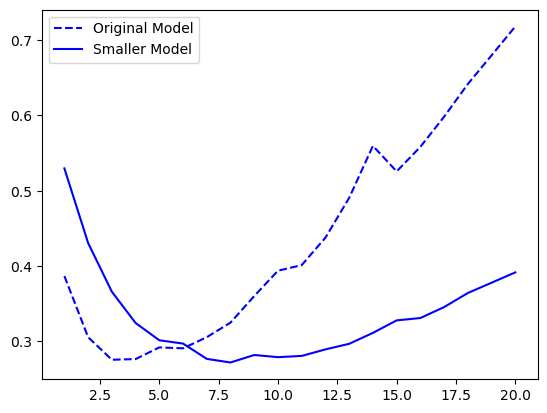

In [13]:
import matplotlib.pyplot as plt

original_model = history_original.history["val_loss"]
smaller_model = history_smaller_model.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, original_model, "b--", label="Original Model")
plt.plot(epochs, smaller_model, "b-", label="Smaller Model")
plt.legend()

Smaller model tend to start overfitting after a while where the original model starts sooner.

In [14]:
model = keras.Sequential([layers.Dense(512, activation="relu"),
                          layers.Dense(512, activation="relu"),
                          layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(train_data, train_labels,
                                 epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 98ms/step - loss: 0.5536 - accuracy: 0.7571 - val_loss: 0.3469 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 3s 93ms/step - loss: 0.2456 - accuracy: 0.9043 - val_loss: 0.2806 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 3s 93ms/step - loss: 0.1784 - accuracy: 0.9311 - val_loss: 0.2732 - val_accuracy: 0.8933
Epoch 4/20
30/30 [==============================] - 3s 94ms/step - loss: 0.0868 - accuracy: 0.9717 - val_loss: 0.3454 - val_accuracy: 0.8931
Epoch 5/20
30/30 [==============================] - 3s 85ms/step - loss: 0.1187 - accuracy: 0.9751 - val_loss: 0.3369 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 2s 79ms/step - loss: 0.0057 - accuracy: 0.9993 - val_loss: 0.4934 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 2s 81ms/step - loss: 7.8860e-04 - accuracy: 0.9999 - val_loss: 0.6145 - val_accuracy: 0.8883
Epoch 8/2

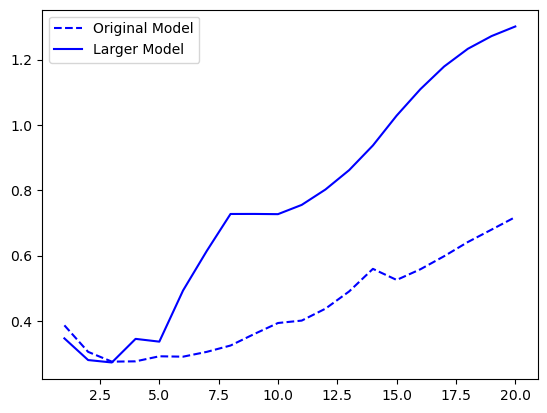

In [15]:
original_model = history_original.history["val_loss"]
larger_model = history_larger_model.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, original_model, "b--", label="Original Model")
plt.plot(epochs, larger_model, "b-", label="Larger Model")
plt.legend()

Larger model tend to overfit as soon as the training start where the original model is overfitting after sometime.

In [16]:
from tensorflow.keras import regularizers
model = keras.Sequential([layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
                          layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
                          layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(train_data, train_labels,
                           epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 35ms/step - loss: 0.5903 - accuracy: 0.7805 - val_loss: 0.4642 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3920 - accuracy: 0.8975 - val_loss: 0.3901 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3274 - accuracy: 0.9191 - val_loss: 0.3939 - val_accuracy: 0.8707
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2983 - accuracy: 0.9256 - val_loss: 0.3631 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2727 - accuracy: 0.9361 - val_loss: 0.3633 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2654 - accuracy: 0.9373 - val_loss: 0.3694 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2539 - accuracy: 0.9411 - val_loss: 0.4048 - val_accuracy: 0.8734
Epoch 8/20
30/30 [=

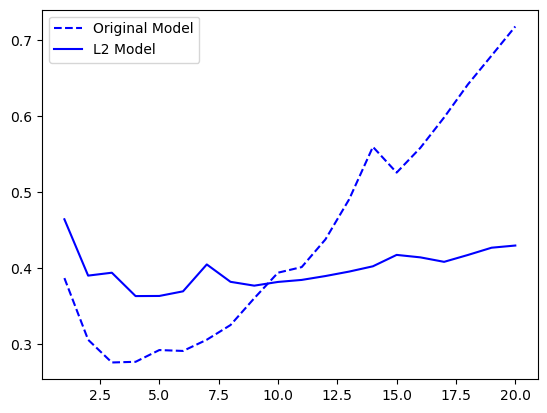

In [17]:
original_model = history_original.history["val_loss"]
l2_model = history_l2_reg.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, original_model, "b--", label="Original Model")
plt.plot(epochs, l2_model, "b-", label="L2 Model")
plt.legend()

L2 is resistant to overfitting than the original model as it adds values to the loss and the neural net trying to reduce it

In [18]:
model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dropout(0.5),
                          layers.Dense(16, activation="relu"),
                          layers.Dropout(0.5),
                          layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 16ms/step - loss: 0.6134 - accuracy: 0.6561 - val_loss: 0.4739 - val_accuracy: 0.8426
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4739 - accuracy: 0.7959 - val_loss: 0.3758 - val_accuracy: 0.8703
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3917 - accuracy: 0.8476 - val_loss: 0.3246 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3299 - accuracy: 0.8769 - val_loss: 0.2946 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2906 - accuracy: 0.8973 - val_loss: 0.2806 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2543 - accuracy: 0.9138 - val_loss: 0.2778 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2227 - accuracy: 0.9241 - val_loss: 0.2833 - val_accuracy: 0.8851
Epoch 8/20
30/30 [=

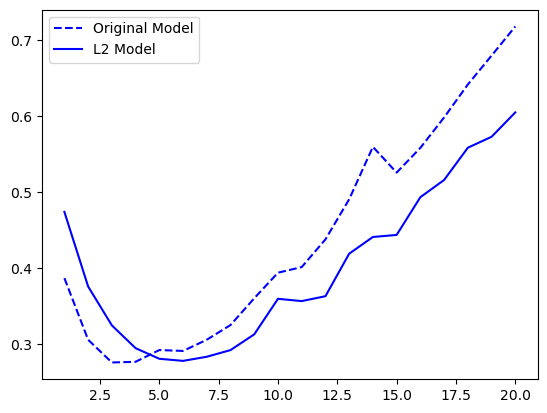

In [19]:
original_model = history_original.history["val_loss"]
drop_model = history_dropout.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, original_model, "b--", label="Original Model")
plt.plot(epochs, drop_model, "b-", label="L2 Model")
plt.legend()